# Classification de variétés de fleurs - Partie 1

Dans cette partie du cours, vous allez entraîner par vous-même un modèle capable de classer une variété de fleur, comme vu au tout début de ce cours.

## Exploration des données

In [1]:
import pandas as pd

Nous allons ouvrir à nouveau le fichier 'iris_dataset.csv' contenu dans le dossier 'data'. Il n'y a pas besoin de préciser le nom des colonnes cette fois puisque ceux-ci ont été ajouté au fichier.

In [3]:
df = pd.read_csv('data/iris_dataset.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Nous affichons les informations du DataFrame pour s'assurer qu'il ne manque aucune données:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Au cours précédent, vous avez ouvert ce fichier et produit différents graphiques, vous permettant ainsi de visualiser vos données et de vous en donner une nouvelle compréhension. Cette étape d'exploration des données est cruciale pour réussir à développer des modèles efficaces.

Puisque vous avez déjà réalisé cette étape, nous ne la recommencerons pas ici. Cependant, nous rappelons juste ci-dessous la distribution des classes dans le jeu de données. 

Nous pouvons voir qu'il y a 3 classes différentes, ayant chacune 150 exemples. Nous avons donc à faire un un problème de classification multiclasses, et pour lequel les données sont équilibrées.

In [4]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

<AxesSubplot:>

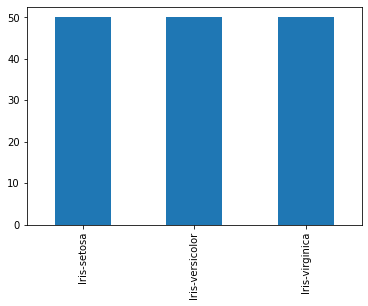

In [5]:
df['class'].value_counts().plot.bar()

## Jeux de données - Dataset

### Train


Pour créer un modèle, on a besoin de données d'entraînement. En général, lorsque l'on obtient ces données d'un site (Kaggle, Google, Amazon, ...), ces données sont nommées "train_set", "train_dataset".

## Validation

Cependant, il est également important de pouvoir évaluer la qualité de l'entraînement. Pour cela on utilise un jeu de données dit de "validation" ou de "developpement", généralement appelé **valset** ou **devset**. Parfois, les données de validation sont fournies avec les données d'entraînement, mais ce n'est pas toujours le cas. Ainsi en général, on créé les données de validation en prenant une portion des données d'entraînement. Traditionnellement, on conserve 70 - 80 ou 90% des données d'entraînement et on prend le reste pour les données de validation. 

## Test set

Les données d'entraînement et de validation peuvent servir à entraîner plusieurs modèles. Afin de réellement voir lequel est le plus performant, on utilise également des données de **test**, généralement appelé **testset**. Il s'agit de données que le modèle n'aura jamais vu pendant la phase d'entraînement, ce qui permet de tester les performances du modèles dans une situation réelles. 



## Préparer les données



In [8]:
data = df.iloc[:, :-1] # on prend toutes les lignes et toutes les colonnes, sauf la dernière
target = df.iloc[:, -1] # on prend toutes les lignes et seulement la dernière colonne

In [9]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
target.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [11]:
# on importe la fonction train_test_split
from sklearn.model_selection import train_test_split

# on divise les données brutes en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data, # les données d'entraînement
                                                    target, # les classes
                                                    train_size = .75 # taille alloué au train set par rapport à data
                                                    )

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

## Entraîner le modèle

Dans un tâche d'apprentissage supervisé, l'objectif pour un modèle est de définir les meilleurs paramètres pour une certaine fonction à partir des données qui lui sont présentées. L'objectif à terme d'un modèle est d'être utilisé en production pour prédire des résultats à partir de nouvelles données qu'il n'a jamais vues. Ainsi, lors de l'entraînement d'un modèle, il est important d'évaluer sa capacité à **généraliser**. 


In [13]:
# Instantier le modèle
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Valider l'entraînement

Dans un cadre d'apprentissage supervisé, on utilise le test set que l'on a créé ou qui est fourni avec les données pour évaluer notre modèle. Il existe plusieurs métriques suivant le problème traité (classification, régression, ...). Pour le classfication, on évalue la **précision** du modèle, c'est à dire sa capacité à prédire correctement la classe d'un nouveau point de donnée. Ainsi, plus la précision est élevée et plus un modèle est performant.


De la même manière, tous les algorithmes disponibles dans ``scikit-learn`` possèdent une fonction ``predict()`` qui permet de traiter un nouveau point de donnée.

In [15]:
predictions = knn.predict(X_test)
predictions

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

Chaque algorithme implémenté dans ``scikit-learn`` possède sa propre métrique, disponible avec la fonction ``score()``. 

In [19]:
knn_acc = knn.score(X_test, y_test)
print("Précision du modèle :", knn_acc)

Précision du modèle : 0.9736842105263158


/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


On peut également accéder directement aux métriques à partir de ``scikit-learn``.

In [18]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(predictions, y_test)
print("Précision du modèle :", acc)

Précision du modèle : 0.9736842105263158


## Matrice de confusion - Confusion matrix

Un des inconvénients du score de précision est qu'il ne donne qu'un aperçu général de la capacité du modèle à catégoriser des données. Même si un modèle est précis à 80% ou 90%, il reste toujours un pourcentage d'erreur à corriger, que le score de précision ne permet pas de consulter.

Pour mieux comprendre quelles catégories sont correctement et incorrectement annotées, on peut utiliser une **matrice de confusion**

In [20]:
from sklearn.metrics import confusion_matrix

print("Confusion matrix :")
confusion_matrix(y_test, predictions)

Confusion matrix :


array([[13,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 15]])

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


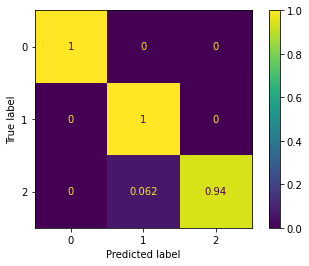

In [21]:
# Autre façon de faire, plus graphique
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

class_names = [0, 1, 2] # on indique les classes pour mieux comprendre la matrice
cmap = plt.cm.Blues # change les couleurs par défaut de la matrice

# plot_confusion_matrix prend le modele et les données de tests et fait une
# prediction sur ces données, pour ensuite afficher le résultat 
plot_confusion_matrix(knn, X_test, y_test,
                      display_labels = class_names,
                    #   cmap = cmap,
                      normalize = 'true' # permet de situer les résultats dans une échelle entre 0 et 1
                      )

## Exercice

Dans les cellules ci-dessous, entraînez un nouveau modèle de Régression Linéaire à partir des mêmes données. Vous validerez l'entraînement du modèle avec les mêmes données de tests dans la cellule d'après.

In [18]:
# instantier le modèle et l'entraîner
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

ValueError: could not convert string to float: 'Iris-setosa'

## Encodage des classes

Les algorithmes utilisés en Machine Learning ne sont pas capables de traiter des données textuelles: ils ne peuvent que traiter des données numériques. La cellule précédente a retourné une erreur car la colonne 'class' ne contenait que des données textuelles. Ainsi, lorsque les jeux de données comportent du texte, il faut trouver un moyen de les transformer sous forme numérique. 

Ceci est relativement facile pour les classes dans des problèmes de classification, mais beaucoup plus difficile lorsque les données d'entraînement elles-mêmes sont textuelles. La recherche pour transformer numériquement du texte est un sujet d'étude à part entière en Traitement Automatique des Langues.

``scikit-learn`` propose deux méthodes pour automatiquement convertir des classes textuelles en classes numériques: ``LabelBinarizer`` et ``LabelEncoder``. ``LabelBinarizer`` permet d'encoder des classes binaires tandis que ``LabelEncoder`` permet d'encoder deux classes ou plus. 

Puisque notre jeu de données contient 3 classes, nous allons utiliser le ``LabelEncoder``:

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

``LabelEncoder`` fait partie d'un type particulier de modèle dans ``scikit-learn`` que l'on appelle un ``transformer``. Ces modèles ne servent pas à prédire une classes mais à transformer des données sous une autre forme. Ils possèdent tous une méthode ``fit()`` leur permettant de comprendre les propriétés des données ainsi qu'une méthode ``transform()`` leur permettant de transformer ces données.

In [23]:
label_encoder.fit(target) # On apprend la structure des données au transformer
transformed_target = label_encoder.transform(target) # on transforme les données

In [24]:
print('10 premières classes transformées: ', 
      transformed_target[:10])
print('10 premières classes non transformées:', 
      target[:10])

10 premières classes transformées:  [0 0 0 0 0 0 0 0 0 0]
10 premières classes non transformées: 0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: class, dtype: object


In [25]:
# on peut toujours faire la transformation inverse 
# pour retrouver le nom d'origine de la classe
print('10 premières classes non transformées:',
      label_encoder.inverse_transform(transformed_target[:10]))

10 premières classes non transformées: ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


### Note

Certains algorithmes peuvent accepter des classes textuelles. Cependant par convention, il est préférable de toujours convertir les classes textuelles en classes numériques, d'autant plus que les algorithmes utilisés en Deep Learning eux n'acceptent que des données numériques.

Pour repasser des classes numériques aux classes textuelles (et inversement), on fait en sorte de créer un fichier de mapping permettant de lier les deux types de classes.

La propriété ``classes_`` du LabelEncoder permet de retrouver le noms des classes d'origines. On peut donc utiliser cette propriété pour créer notre fichier de mapping:

In [26]:
mapping_classes = {} # on crée un dictionnaire qui servirait de mapping
for i, classe in enumerate(label_encoder.classes_):
    # chaque index et nom de classe devient une clé dans le dictionnaire
    mapping_classes[i] = classe
    mapping_classes[classe] = i
print("mapping_classes: ",mapping_classes)
print("mapping_classes[0]: ", mapping_classes[0])
print("mapping_classes['Iris-setosa']: ", mapping_classes['Iris-setosa'])

mapping_classes:  {0: 'Iris-setosa', 'Iris-setosa': 0, 1: 'Iris-versicolor', 'Iris-versicolor': 1, 2: 'Iris-virginica', 'Iris-virginica': 2}
mapping_classes[0]:  Iris-setosa
mapping_classes['Iris-setosa']:  0


In [27]:
mapping_classes

{0: 'Iris-setosa',
 'Iris-setosa': 0,
 1: 'Iris-versicolor',
 'Iris-versicolor': 1,
 2: 'Iris-virginica',
 'Iris-virginica': 2}

Bien que l'on puisse utiliser ce mapping directement, on en aura besoin plus tard lorsque le modèle sera mis en production, c'est-à-dire mis en ligne pour faire de nouvelles prédictions. On a donc besoin de sauvegarder le mapping sur le disque. 

Puisque l'on a créé un dictionnaire, nous allons sauvegarder le mapping au format ``json``:

In [28]:
import json

with open('data/iris_class_mapping.json', 'w') as f:
    json.dump(mapping_classes, f, indent=4)

Pour ne plus avoir à encoder la colonne des classes, nous allons remplacer cette dernière par les valeurs encodées puis sauvegarder le nouveau DataFrame sur le disque, afin de le réutiliser plus tard:

In [29]:
df['class'] = transformed_target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
df.to_csv('encoded_iris_dataset.csv', index=False)

## Régression linéaire

Maintenant que les classes sont encodées numériquement, nous pouvons recréer nos trainsets et testset avant d'entraîner un modèle de **Régression Linéaire**.

De manière simpliste, la régression linéaire cherche à identifier la corrélation entre une variable x et une variable. En identifiant cette relation, le modèle doit à terme être capable de tracer une droite permettant de séparer les groupes de données.

<img src='img/linreg.gif'>

In [32]:
# on divise les données brutes en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data, # les données d'entraînement
                                                    transformed_target, # les classes transformées
                                                    train_size = .75
                                                    )

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # instantiation du modele
lr.fit(X_train, y_train) # entrainement

LinearRegression()

In [34]:
lr_acc = lr.score(X_test, y_test) # test du modele
print("Linear Regression score :", lr_acc)

Linear Regression score : 0.9373005420044165


In [35]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_acc = knn.score(X_test, y_test)
knn_acc

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9736842105263158

Pour plus de clarté, visualisons au travers d'un diagramme à barres les performances des deux modèles:

<AxesSubplot:>

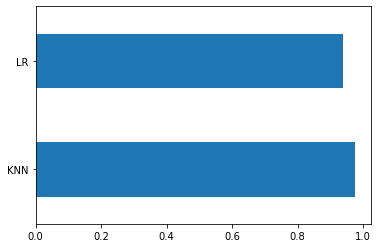

In [37]:
scores = pd.Series([knn_acc, lr_acc], index = ['KNN', 'LR'])
scores.plot.barh()

## Références:


[Définition matrice de confusion (Wikipédia)]()

Documentations:

* Matrice de confusion:
    * Définition : https://fr.wikipedia.org/wiki/Matrice_de_confusion
    * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix
    * https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
* LinearRegression:
    * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html